In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import geoplot
import rasterio
from rasterio.plot import show
import geopandas as gpd
from ipyleaflet import *
import seaborn as sns
%matplotlib inline
import fiona
from matplotlib import pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask
from ipywidgets import IntSlider, ColorPicker, jslink
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl

In [2]:
pm_geometry = gpd.read_file('../data/PM/accident_points_geo.shp', encoding='euc-kr')
cw = gpd.read_file('../data/shp/5181/cw100.shp', encoding='euc-kr')
tl = gpd.read_file('../data/shp/5181/tl100.shp', encoding='euc-kr')
bs = gpd.read_file('../data/shp/5181/bs100.shp', encoding='euc-kr')

point_count = gpd.sjoin(pm_geometry, cw, how='left', op='intersects')
결과 = gpd.sjoin(포인트 객체, 폴리곤 객체, how = 'left', op = 'intersects')
객체명.count()

C:\miniforge\envs\gis\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\miniforge\envs\gis\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\miniforge\envs\gis\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

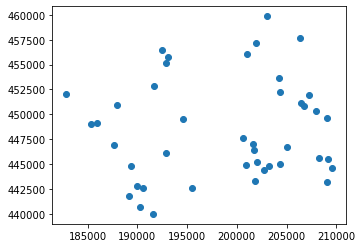

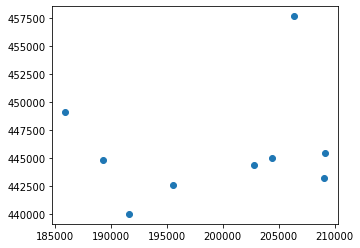

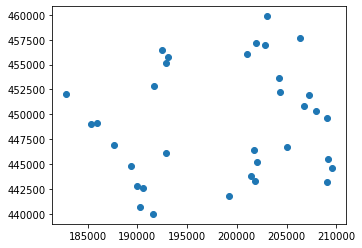

In [3]:
point_intersection1 = gpd.sjoin(pm_geometry, cw, how='inner', op='intersects')
point_intersection1.plot()

point_intersection2 = gpd.sjoin(pm_geometry, tl, how='inner', op='intersects')
point_intersection2.plot()

point_intersection3 = gpd.sjoin(pm_geometry, bs, how='inner', op='intersects')
point_intersection3.plot()

In [4]:
data=[['Crosswalk',len(point_intersection1)],['Traffic Light',len(point_intersection2)],['Bus stop',len(point_intersection3)]]

df=pd.DataFrame(data,columns=["factor","count"])
print(df)

          factor  count
0      Crosswalk     43
1  Traffic Light      9
2       Bus stop     34


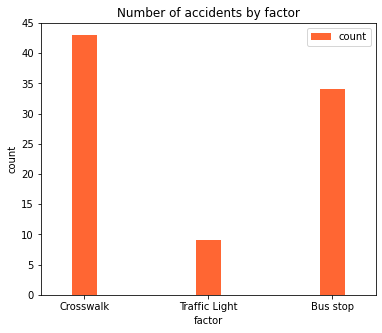

In [5]:
df.plot(x="factor", y="count", kind="bar", rot=0, width=0.2, color= '#FF6633', figsize=(6,5))

plt.title('Number of accidents by factor')
plt.xlabel('factor')
plt.ylabel('count')
plt.ylim(0,45)
plt.rcParams['font.size']=14
plt.savefig('../img/accident_points.png')

신호등 유무와 관계없이 횡단보도 주변에서 사고가 빈번히 발생함